<a href="https://colab.research.google.com/github/Marcondes05/Desempenho_LaLiga/blob/main/LaLiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de desempeno do campeonato espanhol durante a temporada 2023/2024


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/SP1.csv")
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,12/08/2022,20:00,Osasuna,Sevilla,2,1,H,1,1,...,1.52,0.25,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09
1,SP1,13/08/2022,16:00,Celta,Espanol,2,2,D,1,0,...,1.70,-0.75,2.00,1.90,2.02,1.91,2.06,1.93,2.01,1.86
2,SP1,13/08/2022,18:00,Valladolid,Villarreal,0,3,A,0,0,...,1.79,0.25,2.02,1.88,2.02,1.91,2.03,1.91,1.98,1.88
3,SP1,13/08/2022,20:00,Barcelona,Vallecano,0,0,D,0,0,...,2.61,-1.75,1.82,2.08,1.83,2.08,1.86,2.14,1.82,2.06
4,SP1,14/08/2022,16:30,Cadiz,Sociedad,0,1,A,0,1,...,1.50,0.25,2.05,1.85,2.06,1.87,2.08,1.92,2.00,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,04/06/2023,20:00,Betis,Valencia,1,1,D,1,0,...,1.71,0.00,2.14,1.80,2.17,1.78,2.17,1.86,2.08,1.79
376,SP1,04/06/2023,20:00,Celta,Barcelona,2,1,H,1,0,...,1.91,0.00,2.08,1.85,2.09,1.83,2.15,1.89,2.04,1.83
377,SP1,04/06/2023,20:00,Elche,Cadiz,1,1,D,0,1,...,1.94,0.00,1.73,2.08,1.75,2.19,1.93,2.23,1.83,2.04
378,SP1,04/06/2023,20:00,Espanol,Almeria,3,3,D,1,1,...,2.62,-0.25,2.05,1.75,2.12,1.81,2.16,1.83,2.08,1.78


Limpeza de dados e criação das variaveis Dummies

In [ ]:
# Criando as varivéis Dummies na coluna resultado final

df['HomeWin'] = [1 if x == 'H' else 0 for x in df['FTR']]
df['Draw'] = [1 if x == 'D' else 0 for x in df['FTR']]
df['AwayWin'] = [1 if x == 'A' else 0 for x in df['FTR']]
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HomeWin,Draw,AwayWin
0,SP1,12/08/2022,20:00,Osasuna,Sevilla,2,1,H,1,1,...,2.08,1.76,2.20,1.88,2.23,1.79,2.09,1,0,0
1,SP1,13/08/2022,16:00,Celta,Espanol,2,2,D,1,0,...,1.90,2.02,1.91,2.06,1.93,2.01,1.86,0,1,0
2,SP1,13/08/2022,18:00,Valladolid,Villarreal,0,3,A,0,0,...,1.88,2.02,1.91,2.03,1.91,1.98,1.88,0,0,1
3,SP1,13/08/2022,20:00,Barcelona,Vallecano,0,0,D,0,0,...,2.08,1.83,2.08,1.86,2.14,1.82,2.06,0,1,0
4,SP1,14/08/2022,16:30,Cadiz,Sociedad,0,1,A,0,1,...,1.85,2.06,1.87,2.08,1.92,2.00,1.86,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,04/06/2023,20:00,Betis,Valencia,1,1,D,1,0,...,1.80,2.17,1.78,2.17,1.86,2.08,1.79,0,1,0
376,SP1,04/06/2023,20:00,Celta,Barcelona,2,1,H,1,0,...,1.85,2.09,1.83,2.15,1.89,2.04,1.83,1,0,0
377,SP1,04/06/2023,20:00,Elche,Cadiz,1,1,D,0,1,...,2.08,1.75,2.19,1.93,2.23,1.83,2.04,0,1,0
378,SP1,04/06/2023,20:00,Espanol,Almeria,3,3,D,1,1,...,1.75,2.12,1.81,2.16,1.83,2.08,1.78,0,1,0


In [ ]:
df.columns.to_list()

['Div',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'IWCH',
 'IWCD',
 'IWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'VCCH',
 'VCCD',
 'VCCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxCAHH',
 'MaxCAHA',
 'AvgCAHH

In [ ]:
#Selecionando colunas que vão ser utilizadas
colunas = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HomeWin', 'Draw', 'AwayWin', 'HS', 'AS', 'HST', 'AST', 'HTHG', 'HTAG', 'HTR']

In [ ]:
df = df[colunas]
df.columns.to_list()


['HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HomeWin',
 'Draw',
 'AwayWin',
 'HS',
 'AS',
 'HST',
 'AST',
 'HTHG',
 'HTAG',
 'HTR']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   HomeWin   380 non-null    int64 
 5   Draw      380 non-null    int64 
 6   AwayWin   380 non-null    int64 
 7   HS        380 non-null    int64 
 8   AS        380 non-null    int64 
 9   HST       380 non-null    int64 
 10  AST       380 non-null    int64 
 11  HTHG      380 non-null    int64 
 12  HTAG      380 non-null    int64 
 13  HTR       380 non-null    object
dtypes: int64(11), object(3)
memory usage: 41.7+ KB


**1. Análise de Desempenho das Equipes**


Média de Gols Marcados e Sofridos

In [ ]:
#Média de Gols Marcados e Sofridos:
def media_gols(df):
    # Média de gols marcados em casa e fora
    home_goals_mean = df.groupby('HomeTeam')['FTHG'].mean()
    away_goals_mean = df.groupby('AwayTeam')['FTAG'].mean()

    # Média de gols sofridos em casa e fora
    home_goals_conceded_mean = df.groupby('HomeTeam')['FTAG'].mean()
    away_goals_conceded_mean = df.groupby('AwayTeam')['FTHG'].mean()

    media_gols = pd.DataFrame({
        'Media_Gols_Marcados_Casa': home_goals_mean,
        'Media_Gols_Marcados_Fora': away_goals_mean,
        'Media_Gols_Sofridos_Casa': home_goals_conceded_mean,
        'Media_Gols_Sofridos_Fora': away_goals_conceded_mean
    })

    return media_gols

# Chamando a função
media_gols_df = media_gols(df)
media_gols_df


,Media_Gols_Marcados_Casa,Media_Gols_Marcados_Fora,Media_Gols_Sofridos_Casa,Media_Gols_Sofridos_Fora
Almeria,1.526316,1.052632,1.157895,2.263158
Ath Bilbao,1.157895,1.315789,0.789474,1.473684
Ath Madrid,2.157895,1.526316,0.789474,0.947368
Barcelona,1.947368,1.736842,0.210526,0.842105
Betis,1.368421,1.052632,0.947368,1.210526
Cadiz,1.000000,0.578947,1.210526,1.578947
Celta,1.368421,0.894737,1.105263,1.684211
Elche,0.947368,0.631579,1.526316,2.000000
Espanol,1.421053,1.315789,1.842105,1.789474
Getafe,1.105263,0.684211,1.052632,1.315789


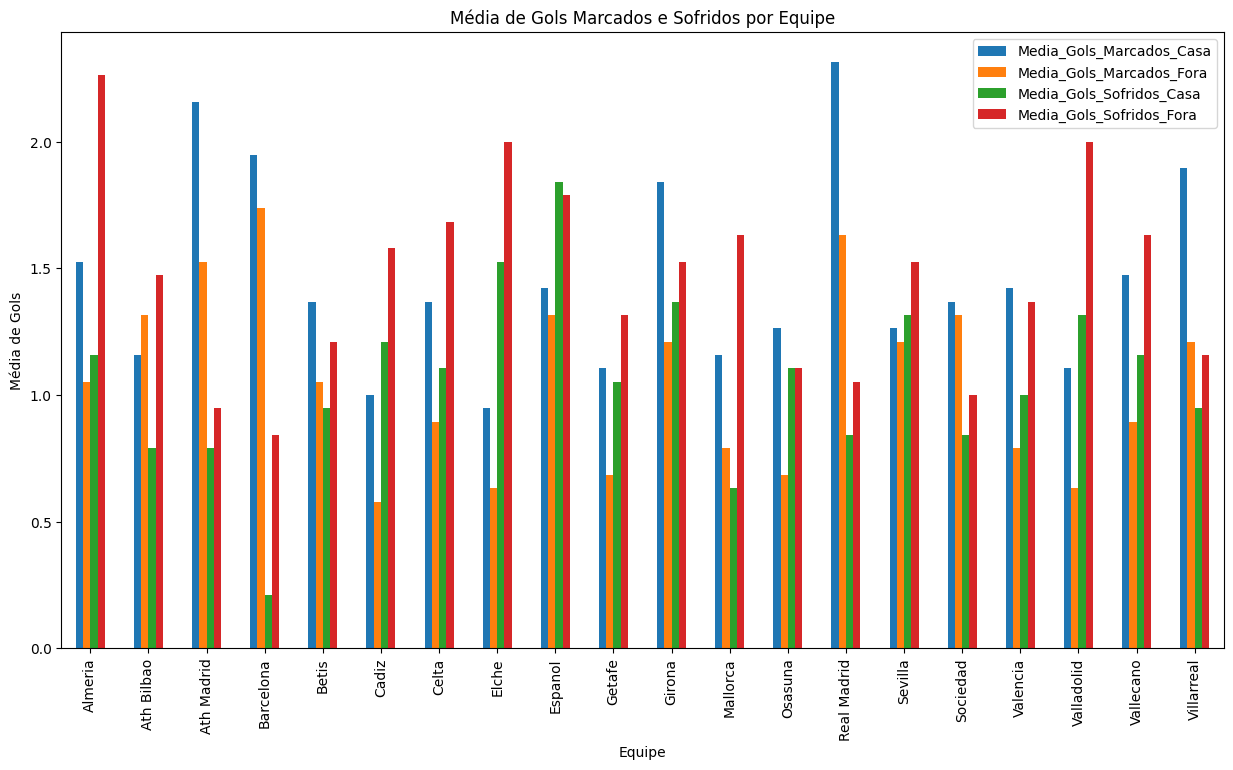

In [ ]:
# Gráfico de média de gols marcados e sofridos por equipe
media_gols_df.plot(kind='bar', figsize=(15, 8))
plt.title('Média de Gols Marcados e Sofridos por Equipe')
plt.ylabel('Média de Gols')
plt.xlabel('Equipe')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


Explicação:

groupby('HomeTeam') e groupby('AwayTeam'): Agrupamos os dados pelas equipes que jogaram em casa ou fora.
mean(): Calculamos a média dos gols marcados e sofridos por cada equipe, tanto jogando em casa quanto fora.

Distribuição de Vitórias, Empates e Derrotas:


In [ ]:
def distrib_vitorias_empates_derrotas_geral(df):
    # Contando o número total de vitórias, empates e derrotas por time
    total_wins = df.groupby('HomeTeam')['HomeWin'].sum() + df.groupby('AwayTeam')['AwayWin'].sum()
    total_draws = df.groupby('HomeTeam')['Draw'].sum() + df.groupby('AwayTeam')['Draw'].sum()

    total_games = df['HomeTeam'].value_counts() + df['AwayTeam'].value_counts()

    # Calculando a proporção geral de vitórias, empates e derrotas para cada time
    proporcao_vitorias = total_wins / total_games
    proporcao_empates = total_draws / total_games
    proporcao_derrotas = 1 - (proporcao_vitorias + proporcao_empates)

    # Unindo as proporções em um único DataFrame para plotar
    distrib_df = pd.DataFrame({
        'Proporcao_Vitorias': proporcao_vitorias,
        'Proporcao_Empates': proporcao_empates,
        'Proporcao_Derrotas': proporcao_derrotas
    }).fillna(0)  # Preenchendo valores nulos com 0

    return distrib_df

# Chamando a função
distrib_geral_df = distrib_vitorias_empates_derrotas_geral(df)
distrib_geral_df

,Proporcao_Vitorias,Proporcao_Empates,Proporcao_Derrotas
HomeTeam,,,
Almeria,0.289474,0.210526,0.500000
Ath Bilbao,0.368421,0.236842,0.394737
Ath Madrid,0.605263,0.210526,0.184211
Barcelona,0.736842,0.105263,0.157895
Betis,0.447368,0.236842,0.315789
Cadiz,0.263158,0.315789,0.421053
Celta,0.289474,0.263158,0.447368
Elche,0.131579,0.263158,0.605263
Espanol,0.210526,0.342105,0.447368


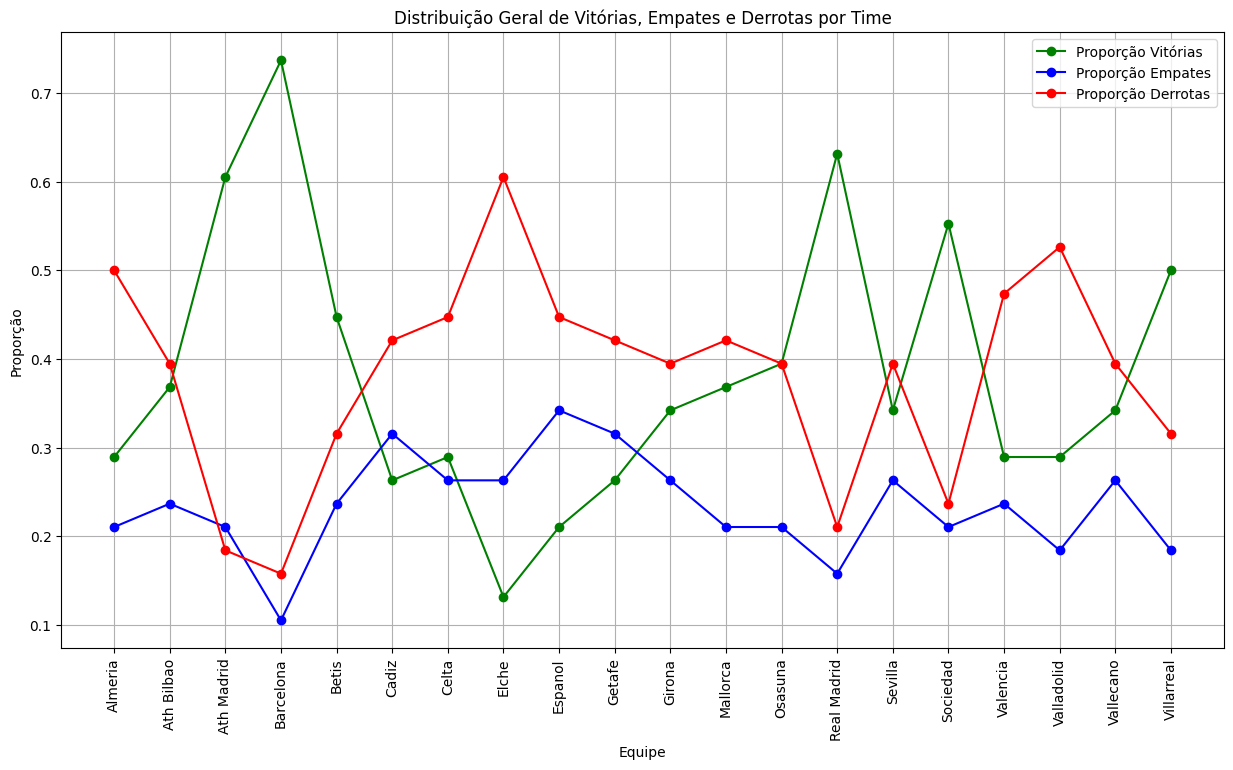

In [ ]:
# Plotando o gráfico de linhas para proporções de vitórias, empates e derrotas por time
plt.figure(figsize=(15, 8))
plt.plot(distrib_geral_df.index, distrib_geral_df['Proporcao_Vitorias'], marker='o', label='Proporção Vitórias', color='g')
plt.plot(distrib_geral_df.index, distrib_geral_df['Proporcao_Empates'], marker='o', label='Proporção Empates', color='b')
plt.plot(distrib_geral_df.index, distrib_geral_df['Proporcao_Derrotas'], marker='o', label='Proporção Derrotas', color='r')

plt.title('Distribuição Geral de Vitórias, Empates e Derrotas por Time')
plt.ylabel('Proporção')
plt.xlabel('Equipe')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Somamos as vitórias, empates e derrotas para obter os valores totais de cada time.
Calculamos as proporções dividindo o número de vitórias, empates e derrotas pelo total de jogos.

**2. Análise de Eficácia Ofensiva e Defensiva**

Eficiência de Finalização:

In [ ]:
def eficiencia_ofensiva_defensiva(df):
    # Agrupando as equipes e somando o total de chutes e gols
    total_shots_for = df.groupby('HomeTeam')['HS'].sum() + df.groupby('AwayTeam')['AS'].sum()
    total_goals_for = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()
    #Chutes e gols sofridos
    total_shots_against = df.groupby('HomeTeam')['AS'].sum() + df.groupby('AwayTeam')['HS'].sum()
    total_goals_against = df.groupby('HomeTeam')['FTAG'].sum() + df.groupby('AwayTeam')['FTHG'].sum()

    # Eficiência de Finalização: Gols Marcados / Chutes Realizados
    eficiencia_finalizacao = total_goals_for / total_shots_for

    # Eficiência Defensiva: Gols Sofridos / Chutes Sofridos
    eficiencia_defensiva = total_goals_against / total_shots_against

    # Criando DataFrame para plotar
    eficiencia_df = pd.DataFrame({
        'Chutes a favor': total_shots_for,
        'Gols Marcados': total_goals_for,
        'Eficiencia_Finalizacao': eficiencia_finalizacao,
        'Chutes sofridos': total_shots_against,
        'Gols sofridos': total_goals_against,
        'Eficiencia_Defensiva': eficiencia_defensiva
    }).fillna(0)  # Preenchendo valores nulos com 0

    return eficiencia_df

# Chamando a função
eficiencia_df = eficiencia_ofensiva_defensiva(df)
eficiencia_df

,Chutes a favor,Gols Marcados,Eficiencia_Finalizacao,Chutes sofridos,Gols sofridos,Eficiencia_Defensiva
HomeTeam,,,,,,
Almeria,440,49,0.111364,542,65,0.119926
Ath Bilbao,549,47,0.085610,389,43,0.110540
Ath Madrid,538,70,0.130112,437,33,0.075515
Barcelona,574,70,0.121951,332,20,0.060241
Betis,418,46,0.110048,465,41,0.088172
Cadiz,395,30,0.075949,549,53,0.096539
Celta,475,43,0.090526,391,53,0.135550
Elche,408,30,0.073529,563,67,0.119005
Espanol,421,52,0.123515,544,69,0.126838


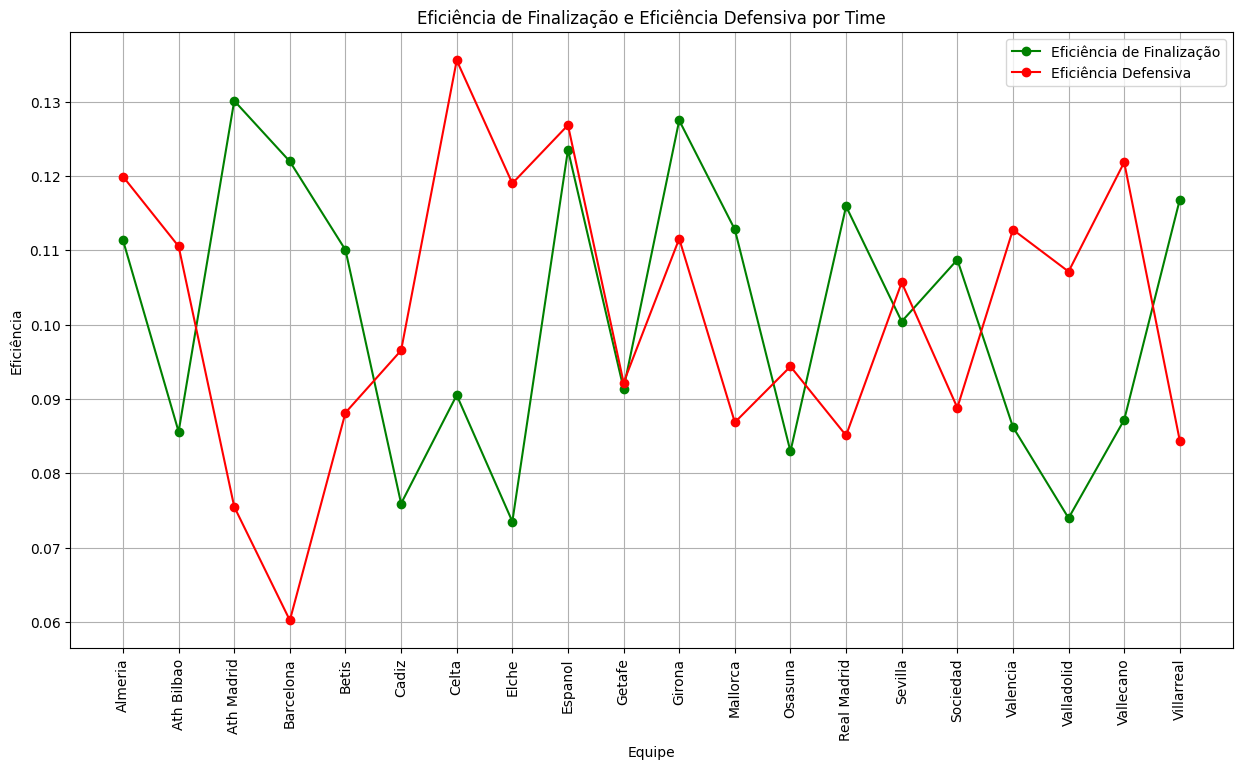

In [ ]:
# Plotando Eficiência de Finalização e Defensiva
plt.figure(figsize=(15, 8))
plt.plot(eficiencia_df.index, eficiencia_df['Eficiencia_Finalizacao'], marker='o', label='Eficiência de Finalização', color='g')
plt.plot(eficiencia_df.index, eficiencia_df['Eficiencia_Defensiva'], marker='o', label='Eficiência Defensiva', color='r')

plt.title('Eficiência de Finalização e Eficiência Defensiva por Time')
plt.ylabel('Eficiência')
plt.xlabel('Equipe')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Eficiência: Calculamos a eficiência dividindo o número de gols pelo número de chutes.
Eficiência Defensiva: Similar à eficiência ofensiva, mas aqui comparamos os chutes sofridos pelos times com os gols sofridos para calcular a eficiência defensiva.

3. Análise de Desempenho por Tempo de Jogo

Impacto do Resultado Parcial (HT) no Resultado Final (FT):


<ipython-input-14-fddfc3edbb19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resultado_HT'] = np.where(df['HTHG'] > df['HTAG'], 'Casa Vence',
<ipython-input-14-fddfc3edbb19>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resultado_FT'] = np.where(df['FTHG'] > df['FTAG'], 'Casa Vence',


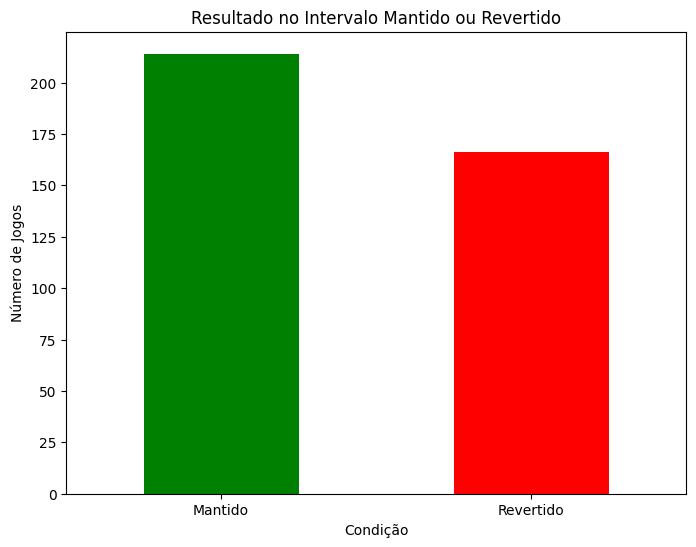

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def impacto_resultado_parcial(df):
    # Criar colunas indicando o resultado do intervalo e o resultado final
    df['Resultado_HT'] = np.where(df['HTHG'] > df['HTAG'], 'Casa Vence',
                                  np.where(df['HTHG'] < df['HTAG'], 'Visitante Vence', 'Empate'))
    df['Resultado_FT'] = np.where(df['FTHG'] > df['FTAG'], 'Casa Vence',
                                  np.where(df['FTHG'] < df['FTAG'], 'Visitante Vence', 'Empate'))

    # Analisar quantas vezes o resultado do intervalo se manteve ou foi revertido no final
    condicoes_mantidas = (df['Resultado_HT'] == df['Resultado_FT']).value_counts()

    # Plotar gráfico de barras para as condições mantidas vs revertidas
    plt.figure(figsize=(8, 6))
    condicoes_mantidas.plot(kind='bar', color=['green', 'red'])
    plt.title('Resultado no Intervalo Mantido ou Revertido')
    plt.ylabel('Número de Jogos')
    plt.xlabel('Condição')
    plt.xticks([0, 1], ['Mantido', 'Revertido'], rotation=0)
    plt.show()

# Chamando a função
impacto_resultado_parcial(df)


Explicação:

np.where: Usado para classificar o resultado no intervalo e no final do jogo em três categorias: "Casa Vence", "Visitante Vence" e "Empate".
Gráfico de Barras: Exibe a quantidade de jogos em que o resultado foi mantido ou revertido.

Comparação de Gols entre Primeiro Tempo e Segundo Tempo:


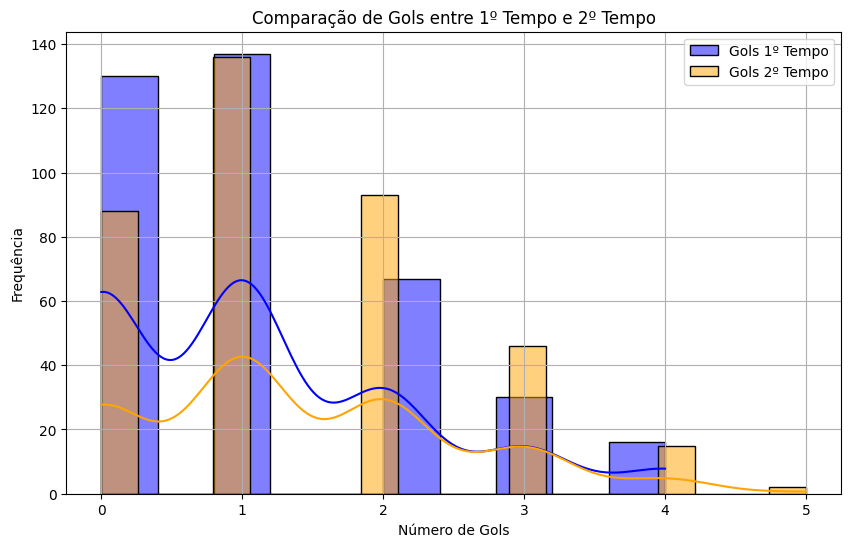

In [ ]:
import seaborn as sns

def comparacao_gols_tempos(df):
    # Comparação de Gols entre Primeiro Tempo e Segundo Tempo
    gols_primeiro_tempo = df['HTHG'] + df['HTAG']
    gols_segundo_tempo = (df['FTHG'] - df['HTHG']) + (df['FTAG'] - df['HTAG'])

    # Plotar histogramas comparando os gols do 1º e 2º tempos
    plt.figure(figsize=(10, 6))
    sns.histplot(gols_primeiro_tempo, color='blue', label='Gols 1º Tempo', kde=True)
    sns.histplot(gols_segundo_tempo, color='orange', label='Gols 2º Tempo', kde=True)

    plt.title('Comparação de Gols entre 1º Tempo e 2º Tempo')
    plt.xlabel('Número de Gols')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.show()

# Chamando a função
comparacao_gols_tempos(df)


Explicação: Calcula e compara os gols marcados no primeiro e segundo tempo usando histogramas para visualizar as distribuições de gols ao longo do jogo.